In [1]:
import time
import pandas as pd
import numpy as np
import solv_fzcp as sfzcp
import uvarprob as uvpr
from processor_new import Estimator, Division

In [2]:
test_file = "./test/test_casado.csv"
# test_file = "./test/test11.csv"
# test_file = "../tst2.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
1,-0.5*x^2*(log(x))+5,0.2,7.0,0,0
2,-exp(-x)*sin(2*pi*x)+1,0.2,7.0,0,0
3,-(sqrt(x))*sin(x)+1,0.2,7.0,0,0
4,x*sin(x)+sin(10.0*x/3.0)+log(x)-0.84*x+1.3,0.2,7.0,0,0
5,x+sin(5.0*x),0.2,7.0,0,0
6,-x*sin(x)+5,0.2,7.0,0,0
7,sin(x)*cos(x)-1.5*(sin(x))^2.0+1.2,0.2,7.0,0,0
8,2*cos(x)+cos(2*x)+5,0.2,7.0,0,0
9,2.0*sin(x)*exp(-x),0.2,7.0,0,0


In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []
bnb2_lipint_points_list = []
bnb2_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [8]:
from test import test_last, test_division

test_last(df, 1e-4, repeat=1, global_lip=False, div=Division.Falsi, alp=0.5)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.239 & 0.199 & 0.116 & 0.121 & 0.083 & 0.082 & 0.044 & 0.065 & 0.033 \\
2 & 0.033 & 0.166 & 0.115 & 0.275 & 0.183 & 0.104 & 0.092 & 0.150 & 0.176 \\
3 & 0.117 & 0.170 & 0.079 & 0.141 & 0.126 & 0.068 & 0.060 & 0.096 & 0.068 \\
4 & 0.270 & 0.255 & 0.194 & 0.248 & 0.217 & 0.143 & 0.121 & 0.115 & 0.090 \\
5 & 0.130 & 0.114 & 0.071 & 0.100 & 0.088 & 0.056 & 0.042 & 0.055 & 0.048 \\
6 & 0.027 & 0.070 & 0.038 & 0.036 & 0.029 & 0.047 & 0.037 & 0.032 & 0.029 \\
7 & 0.237 & 0.183 & 0.122 & 0.174 & 0.149 & 0.082 & 0.073 & 0.085 & 0.076 \\
8 & 0.020 & 0.077 & 0.058 & 0.044 & 0.037 & 0.032 & 0.028 & 0.039 & 0.034 \\
9 & 0.108 & 0.188 & 0.113 & 0.100 & 0.087 & 0.111 & 0.077 & 0.063 & 0.046 \\
10 & 0.241 & 0.364 & 0.257 & 0.260 & 0.243 & 0.201 & 0.179 & 0.174 & 0.165 \\
11 & 0.639 & 0.326 & 0.257 & 0.321 & 0.307 & 0.245 & 0.194 & 0.264 & 0.194 \\
12 & 0.020 & 0.272 & 0.230 & 0.380 & 0.287 & 0.160 & 0.123 & 0.307 & 0.214 \\
13 & 0.815 & 0.693

In [9]:
from test import test_last

test_last(df, 1e-4, repeat=100, global_lip=True, div=Division.Bisection, alp=0.5)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.075 & 0.070 & 0.060 & 0.059 & 0.057 & 0.050 & 0.048 & 0.020 & 0.017 \\
2 & 0.004 & 0.057 & 0.057 & 0.070 & 0.069 & 0.033 & 0.032 & 0.043 & 0.041 \\
3 & 0.070 & 0.056 & 0.055 & 0.050 & 0.048 & 0.042 & 0.040 & 0.033 & 0.031 \\
4 & 0.129 & 0.064 & 0.058 & 0.063 & 0.053 & 0.047 & 0.041 & 0.038 & 0.030 \\
5 & 0.061 & 0.035 & 0.028 & 0.036 & 0.035 & 0.023 & 0.016 & 0.017 & 0.017 \\
6 & 0.007 & 0.014 & 0.014 & 0.012 & 0.011 & 0.009 & 0.009 & 0.009 & 0.008 \\
7 & 0.100 & 0.037 & 0.035 & 0.052 & 0.051 & 0.032 & 0.031 & 0.025 & 0.024 \\
8 & 0.004 & 0.010 & 0.010 & 0.010 & 0.009 & 0.007 & 0.007 & 0.011 & 0.011 \\
9 & 0.066 & 0.246 & 0.242 & 0.061 & 0.059 & 0.163 & 0.160 & 0.034 & 0.034 \\
10 & 0.122 & 0.357 & 0.354 & 0.130 & 0.126 & 0.207 & 0.211 & 0.080 & 0.074 \\
11 & 0.342 & 5.129 & 3.532 & 2.146 & 0.717 & 7.421 & 3.045 & 1.350 & 0.388 \\
12 & 0.003 & 0.080 & 0.079 & 0.084 & 0.050 & 0.044 & 0.043 & 0.048 & 0.034 \\
13 & 0.409 & 0.081

In [8]:
from test import test_last

test_last(df, 1e-4, repeat=1, global_lip=False, div=Division.Falsi)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.109 & 0.087 & 0.049 & 0.075 & 0.051 & 0.032 & 0.025 & 0.025 & 0.019 \\
2 & 0.024 & 0.094 & 0.066 & 0.112 & 0.100 & 0.051 & 0.046 & 0.075 & 0.070 \\
3 & 0.066 & 0.091 & 0.043 & 0.075 & 0.067 & 0.044 & 0.036 & 0.048 & 0.042 \\
4 & 0.145 & 0.134 & 0.102 & 0.127 & 0.117 & 0.072 & 0.057 & 0.058 & 0.047 \\
5 & 0.069 & 0.062 & 0.039 & 0.053 & 0.049 & 0.032 & 0.023 & 0.029 & 0.025 \\
6 & 0.014 & 0.036 & 0.020 & 0.020 & 0.016 & 0.020 & 0.016 & 0.017 & 0.015 \\
7 & 0.112 & 0.089 & 0.062 & 0.083 & 0.075 & 0.050 & 0.040 & 0.048 & 0.036 \\
8 & 0.009 & 0.039 & 0.031 & 0.022 & 0.018 & 0.017 & 0.014 & 0.020 & 0.018 \\
9 & 0.054 & 0.097 & 0.058 & 0.052 & 0.044 & 0.055 & 0.039 & 0.035 & 0.028 \\
10 & 0.125 & 0.185 & 0.132 & 0.133 & 0.126 & 0.103 & 0.091 & 0.093 & 0.092 \\
11 & 0.340 & 0.168 & 0.137 & 0.208 & 0.175 & 0.124 & 0.100 & 0.128 & 0.097 \\
12 & 0.011 & 0.126 & 0.101 & 0.183 & 0.146 & 0.077 & 0.060 & 0.117 & 0.090 \\
13 & 0.412 & 0.388

/Users/wuzhongqi/PycharmProjects/FirstZeroSolver/test.py:300: SyntaxWarning: invalid escape sequence '\ '
  return 'No\ root'


In [11]:
from test import test_last

test_last(df, 1e-4, repeat=1, global_lip=False, div=Division.Bisection)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.119 & 0.136 & 0.105 & 0.119 & 0.100 & 0.040 & 0.031 & 0.029 & 0.025 \\
2 & 0.023 & 0.139 & 0.091 & 0.148 & 0.139 & 0.065 & 0.069 & 0.139 & 0.096 \\
3 & 0.098 & 0.141 & 0.108 & 0.193 & 0.170 & 0.057 & 0.050 & 0.068 & 0.051 \\
4 & 0.207 & 0.244 & 0.198 & 0.246 & 0.223 & 0.100 & 0.139 & 0.181 & 0.068 \\
5 & 0.131 & 0.119 & 0.070 & 0.096 & 0.083 & 0.043 & 0.032 & 0.037 & 0.033 \\
6 & 0.021 & 0.050 & 0.026 & 0.034 & 0.021 & 0.027 & 0.020 & 0.024 & 0.020 \\
7 & 0.153 & 0.151 & 0.124 & 0.192 & 0.173 & 0.065 & 0.051 & 0.063 & 0.047 \\
8 & 0.015 & 0.050 & 0.037 & 0.029 & 0.024 & 0.022 & 0.019 & 0.027 & 0.031 \\
9 & 0.071 & 0.157 & 0.134 & 0.115 & 0.104 & 0.079 & 0.053 & 0.043 & 0.034 \\
10 & 0.149 & 0.260 & 0.189 & 0.197 & 0.185 & 0.124 & 0.116 & 0.113 & 0.107 \\
11 & 0.393 & 0.216 & 0.168 & 0.264 & 0.237 & 0.139 & 0.105 & 0.142 & 0.109 \\
12 & 0.008 & 0.138 & 0.115 & 0.209 & 0.173 & 0.094 & 0.069 & 0.139 & 0.104 \\
13 & 0.460 & 0.407

In [8]:
from test import test_linear

test_linear(df, 1e-4, repeat=1,alp=0.7)

test.Index,IBB,PL_N,PI_N,PL_R,PI_R
1 & 0.200 & \textbf{0.163} & \textbf{0.101} & \textbf{0.097} & \textbf{0.076} & \textbf{0.131} & \textbf{0.118} & \textbf{0.049} & \textbf{0.040} \\
2 & 0.041 & 0.140 & 0.118 & 0.066 & 0.062 & 0.142 & 0.114 & 0.081 & 0.183 \\
3 & 0.129 & \textbf{0.119} & \textbf{0.099} & \textbf{0.071} & \textbf{0.067} & 0.156 & 0.139 & \textbf{0.068} & \textbf{0.064} \\
4 & 0.293 & \textbf{0.174} & 0.360 & \textbf{0.213} & \textbf{0.096} & 0.329 & 0.353 & 0.295 & \textbf{0.220} \\
5 & 0.352 & \textbf{0.130} & \textbf{0.068} & \textbf{0.058} & \textbf{0.093} & \textbf{0.124} & \textbf{0.095} & \textbf{0.057} & \textbf{0.043} \\
6 & 0.036 & 0.044 & \textbf{0.032} & \textbf{0.022} & \textbf{0.019} & 0.080 & 0.039 & 0.036 & \textbf{0.028} \\
7 & 0.460 & \textbf{0.091} & \textbf{0.071} & \textbf{0.067} & \textbf{0.062} & \textbf{0.205} & \textbf{0.280} & \textbf{0.181} & \textbf{0.302} \\
8 & 0.047 & \textbf{0.042} & 0.088 & \textbf{0.021} & \textbf{0.016} & 0.213 & 0.121

In [16]:
from test import test_quadratic

test_quadratic(df, 1e-4, repeat=500,alp=0.7)

test.Index, IBB, PL_R, PI_R,QL_R,QI_R
1 & 0.052 & \textbf{0.039} & \textbf{0.035} & \textbf{0.014} & \textbf{0.013} & \textbf{0.025} & \textbf{0.023} & \textbf{0.014} & \textbf{0.013} \\
2 & 0.004 & 0.032 & 0.031 & 0.042 & 0.041 & 0.038 & 0.036 & 0.053 & 0.052 \\
3 & 0.568 & \textbf{0.036} & \textbf{0.034} & \textbf{0.029} & \textbf{0.027} & \textbf{0.031} & \textbf{0.030} & \textbf{0.035} & \textbf{0.033} \\
4 & 0.131 & \textbf{0.053} & \textbf{0.041} & \textbf{0.038} & \textbf{0.030} & \textbf{0.051} & \textbf{0.044} & \textbf{0.048} & \textbf{0.045} \\
5 & 0.061 & \textbf{0.027} & \textbf{0.021} & \textbf{0.018} & \textbf{0.017} & \textbf{0.023} & \textbf{0.021} & \textbf{0.023} & \textbf{0.022} \\
6 & 0.007 & 0.010 & 0.009 & 0.009 & 0.009 & 0.013 & 0.013 & 0.011 & 0.010 \\
7 & 0.100 & \textbf{0.034} & \textbf{0.032} & \textbf{0.025} & \textbf{0.023} & \textbf{0.041} & \textbf{0.037} & \textbf{0.037} & \textbf{0.035} \\
8 & 0.004 & 0.007 & 0.007 & 0.011 & 0.010 & 0.009 & 0.009 & 0.0

In [8]:
from test import test_adap_lip

test_adap_lip(df, 1e-4, repeat=100,alp=0.7)

test.Index, IBB, PL_R, PI_R,QL_R,QI_R
1 & 0.093 & \textbf{0.043} & \textbf{0.035} & \textbf{0.031} & \textbf{0.028} & \textbf{0.045} & \textbf{0.041} & \textbf{0.026} & \textbf{0.025} \\
2 & 0.008 & 0.081 & 0.077 & 0.122 & 0.117 & 0.073 & 0.071 & 0.106 & 0.101 \\
3 & 0.098 & \textbf{0.071} & \textbf{0.064} & \textbf{0.087} & \textbf{0.066} & \textbf{0.060} & \textbf{0.057} & \textbf{0.071} & \textbf{0.068} \\
4 & 0.252 & \textbf{0.141} & \textbf{0.105} & \textbf{0.103} & \textbf{0.089} & \textbf{0.100} & \textbf{0.087} & \textbf{0.093} & \textbf{0.090} \\
5 & 0.140 & \textbf{0.061} & \textbf{0.047} & \textbf{0.056} & \textbf{0.048} & \textbf{0.045} & \textbf{0.043} & \textbf{0.048} & \textbf{0.043} \\
6 & 0.014 & 0.035 & 0.028 & 0.029 & 0.027 & 0.025 & 0.024 & 0.022 & 0.020 \\
7 & 0.192 & \textbf{0.093} & \textbf{0.077} & \textbf{0.091} & \textbf{0.069} & \textbf{0.078} & \textbf{0.071} & \textbf{0.072} & \textbf{0.068} \\
8 & 0.008 & 0.029 & 0.028 & 0.036 & 0.034 & 0.018 & 0.017 & 0.0

In [9]:
from test import test_division

test_division(df, 1e-4, repeat=100, alp=0.7, reduction=True,rho_g=999999999,rho_l=999999999)

№, Bisection, Piyavskii, Casado
1 & 0.072 & \textbf{0.048} & \textbf{0.053} & \textbf{0.054} & \textbf{0.025} & \textbf{0.025} & \textbf{0.025} \\
2 & 0.004 & 0.033 & 0.037 & 0.044 & 0.042 & 0.047 & 0.049 \\
3 & 0.048 & \textbf{0.034} & \textbf{0.038} & \textbf{0.042} & \textbf{0.033} & \textbf{0.032} & \textbf{0.033} \\
4 & 0.123 & \textbf{0.040} & \textbf{0.043} & \textbf{0.046} & \textbf{0.052} & \textbf{0.051} & \textbf{0.059} \\
5 & 0.059 & \textbf{0.021} & \textbf{0.020} & \textbf{0.025} & \textbf{0.022} & \textbf{0.020} & \textbf{0.026} \\
6 & 0.008 & 0.009 & 0.011 & 0.010 & 0.015 & 0.015 & 0.015 \\
7 & 0.106 & \textbf{0.033} & \textbf{0.032} & \textbf{0.036} & \textbf{0.040} & \textbf{0.039} & \textbf{0.038} \\
8 & 0.004 & 0.007 & 0.007 & 0.007 & 0.014 & 0.013 & 0.014 \\
9 & 0.045 & 0.145 & 0.157 & 0.190 & \textbf{0.044} & 0.049 & 0.051 \\
10 & 0.117 & 0.197 & 0.219 & 0.266 & \textbf{0.094} & \textbf{0.090} & \textbf{0.095} \\
11 & 0.325 & 3.375 & 5.309 & 4.055 & \textbf{0.124}

In [8]:
import interval as ival


def get_full_interval(intervals):
    if len(intervals) == 0:
        return 'No root'
    else:
        if isinstance(intervals[0], tuple):
            return ival.Interval([intervals[0][0].x[0], intervals[-1][0].x[1]])
        else:
            return ival.Interval([intervals[0].x[0], intervals[-1].x[1]])


res_list = [0] * len(list(df.itertuples()))
for i, test in enumerate(df.itertuples()):
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': [], 'bnb2_pslint_points_list': [], 'bnb2_psl_points_list': [],
                             'bnb2_lipint_points_list': [],
                             'bnb2_lip_points_list': []}

    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_lipint_points_list']), True)
    res = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=False,
                           estimator=Estimator.PSL, reduction=True).first_crossing_zero_point
    res_list[i] = res
    # T1 = time.perf_counter()
    # qir = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=2, reduction=1)
    # print('QI_R:', qir)
    # print('Full interval', get_full_interval(qir.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # qir = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSQE, reduction=1)
    # print('QI_R:', qir)
    # print('Full interval', get_full_interval(qir.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    #
    # T1 = time.perf_counter()
    # qir = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSQE, reduction=1)
    # print('QL_R:', qir)
    # print('Full interval', get_full_interval(qir.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # plr = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSL, reduction=1)
    # print('PI_R:', plr.nsteps)
    # print('width of full interval', get_full_interval(plr.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    #
    # T1 = time.perf_counter()
    # plr = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSL, reduction=1)
    # print('PL_R:', plr.nsteps)
    # print('width of full interval', get_full_interval(plr.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    # T1 = time.perf_counter()
    # pln = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSL, reduction=False, div=Division.Bisection, alp=0)
    # print('QL_N:', pln.nsteps)
    # print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    #
    # T1 = time.perf_counter()
    # pln = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSL, reduction=False, div=Division.Falsi, alp=0)
    # print('QL_N:', pln.nsteps)
    # print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

    T1 = time.perf_counter()
    pln = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=False,
                           estimator=Estimator.PSL, reduction=True, div=Division.Bisection, alp=0.7)
    print('QL_N:', pln.nsteps)
    print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    T2 = time.perf_counter()
    print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # pln = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=False,
    #                        estimator=Estimator.PSL, reduction=0)
    # print('PL_N:', pln.nsteps)
    # print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # ibb = sfzcp.cas(prob=prob, epsilon=(test.b - test.a) * (1e-4))
    # print('IBB:', ibb)
    # print('Full interval', get_full_interval(ibb.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

1
QL_N: 6
width of full interval [3.012, 3.012]
time= 0.10062498040497303
2
QL_N: 8
width of full interval No root
time= 0.11124997399747372
3
QL_N: 8
width of full interval [1.175, 1.175]
time= 0.10874995496124029
4
QL_N: 10
width of full interval [2.961, 2.961]
time= 0.14058302622288465
5
QL_N: 8
width of full interval [0.821, 0.821]
time= 0.09458395652472973
6
QL_N: 5
width of full interval No root
time= 0.051999930292367935
7
QL_N: 8
width of full interval [1.341, 1.341]
time= 0.12679188512265682
8
QL_N: 3
width of full interval No root
time= 0.05154102109372616
9
QL_N: 10
width of full interval [3.142, 3.142]
time= 0.13262499123811722
10
QL_N: 19
width of full interval [1.266, 1.266]
time= 0.22504199296236038
11
QL_N: 20
width of full interval [1.364, 1.365]
time= 0.2170410007238388
12
QL_N: 16
width of full interval No root
time= 0.15554099809378386
13
QL_N: 22
width of full interval [4.783, 4.783]
time= 0.4515829496085644
14
QL_N: 10
width of full interval [3.281, 3.281]
time= 0

3.011688503880316
1.1747962450251304
2.9609148653621684
0.8209239701189412
1.3407551839789096
3.1417295283245785
1.2655396976168434
1.3646353906324622
4.783089432062811
3.2811206704372795
3.141027756902915
1.571091798917771
1.9685606368302322
1.1407145611356304
-9.140300799418927
0.14716173579294567
-9.817587614171268
0.09239374625531063
1.258346469273547
-2.0945290873083087
1.0353962061341018
-0.8002288316066815


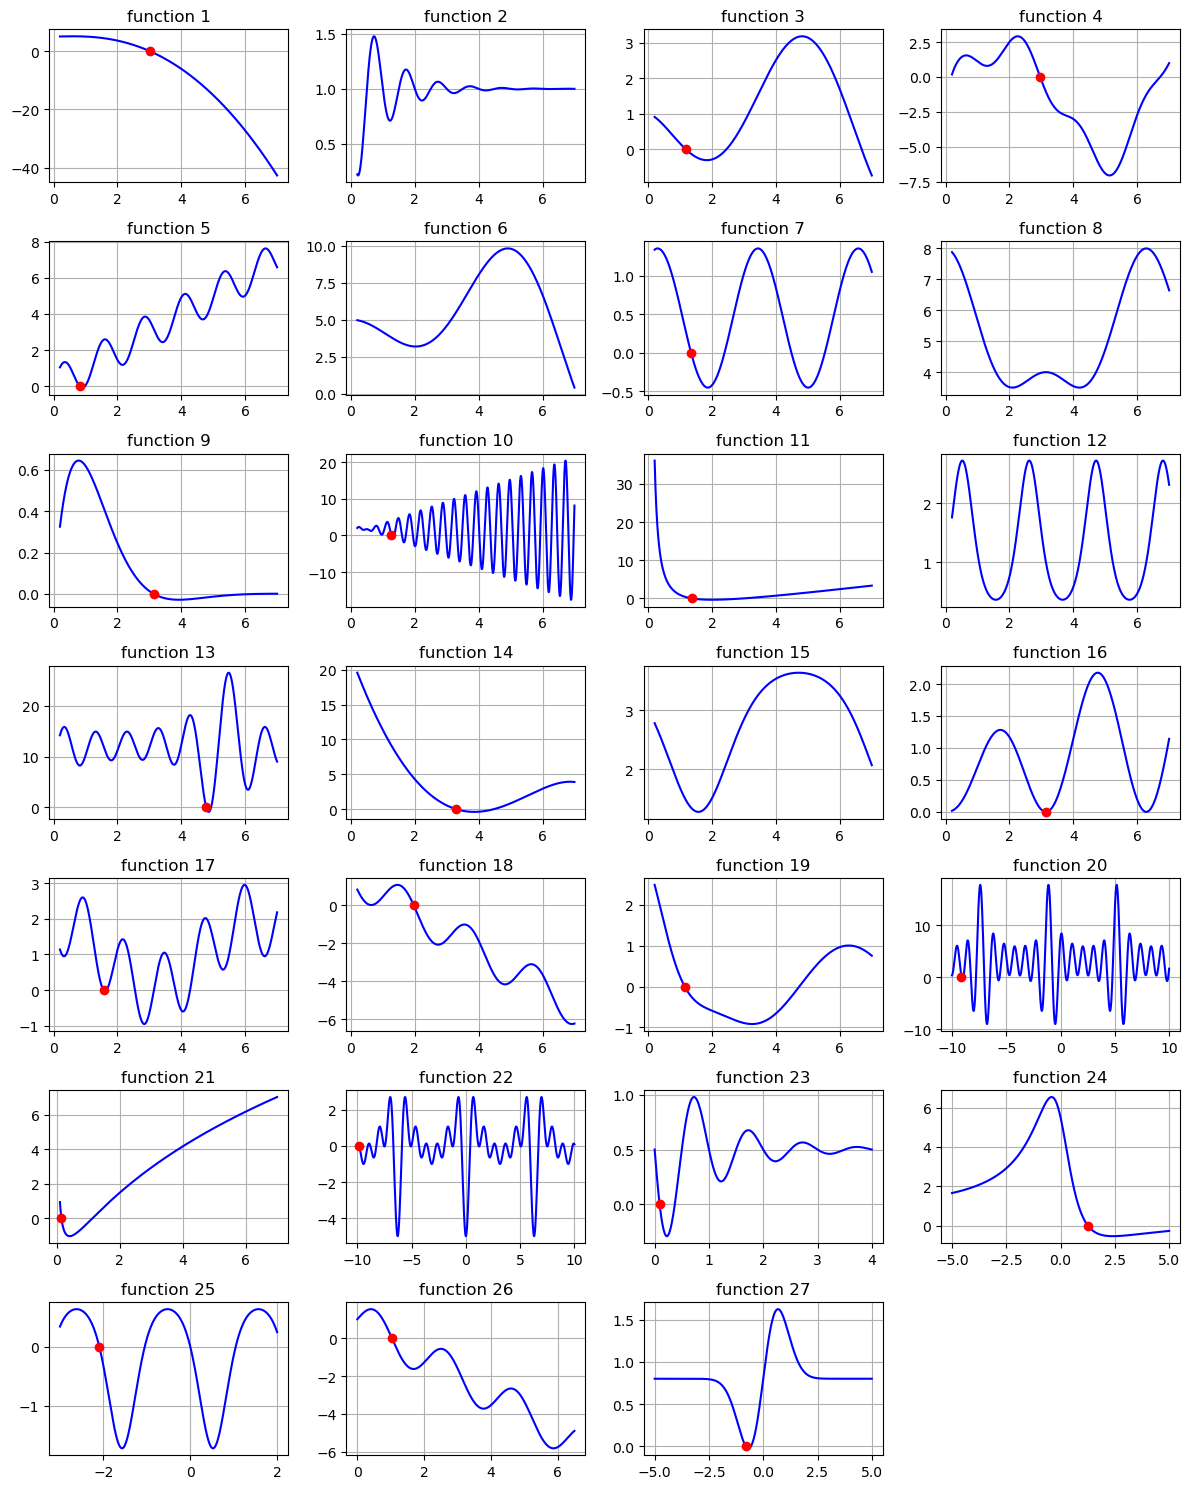

In [9]:
import matplotlib.pyplot as plt

cols = 4
fig, axes = plt.subplots(7, cols, figsize=(12, 15))


def sub_plot_problem(prob, tips, zero, npoints=1000):
    """
       Plots a problem
       
       Parameters
       ----------
       prob : UniVarProblem
           The problem to plot
       npoints : int
           number of points used to draw a plot
       """
    step = (prob.b - prob.a) / npoints
    ta = np.arange(prob.a, prob.b + step, step)
    num_points = len(ta)
    fta = np.empty([num_points])

    for i in range(num_points):
        fta[i] = prob.objective(ta[i])

    ax.plot(ta, fta, tips['function'])
    if len(zero) != 0:
        z = zero[0][0].mid()
        print(z)
        ax.scatter(z, 0, color='red', zorder=3)
        # ax.text(z-0.2, 0, rf'$x^*$', fontsize=12, ha='center', color='red')
    # ax.ylim([lb - d - legend, ub + d])


for i, test in enumerate(df.itertuples()):
    ax = axes[i // cols, i % cols]
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    sub_plot_problem(prob, {'function': 'b-'}, res_list[i])
    ax.set_title(f'function {i + 1}')
    ax.grid(True)

# for j in range(len(df.itertuples()), cols * 7):
fig.delaxes(axes.flatten()[27])

plt.tight_layout()
# plt.show()
plt.savefig('./all_funs.png', dpi=500)
